In [89]:
from datetime import datetime
import numpy as np
import warnings

# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot

import pandas as pd
import matplotlib.pyplot  as plt
import math
import mplfinance as mpf

In [90]:
url = "https://raw.githubusercontent.com/rahmantaufik27/dataset/main/study/forecasting_stock_price_2.csv"
df = pd.read_csv(url, parse_dates=['Timestamp'], index_col='Timestamp')

# Resample to daily data
df = df.resample('W').mean()  # can also use 'W' for weekly, 'H' for hourly, etc.
df



,Open Price,Close Price
Timestamp,,
2015-01-04,18873.673200,18874.252267
2015-01-11,18661.844053,18661.391333
2015-01-18,18922.719680,18922.720107
2015-01-25,19764.394240,19764.521680
2015-02-01,20352.850800,20352.534400
...,...,...
2020-11-29,29431.775741,29431.566772
2020-12-06,29665.479200,29665.430952
2020-12-13,30383.540000,30383.888307


In [91]:
n = int(len(df) * 0.6)
m = int(len(df) * 0.8)

Close=df['Close Price'].values
df_train, train_close = df.head(n), Close[:n]
df_validation, val_close = df[n:m], Close[n:m]
df_test, test_close = df[:m], Close[m:] 

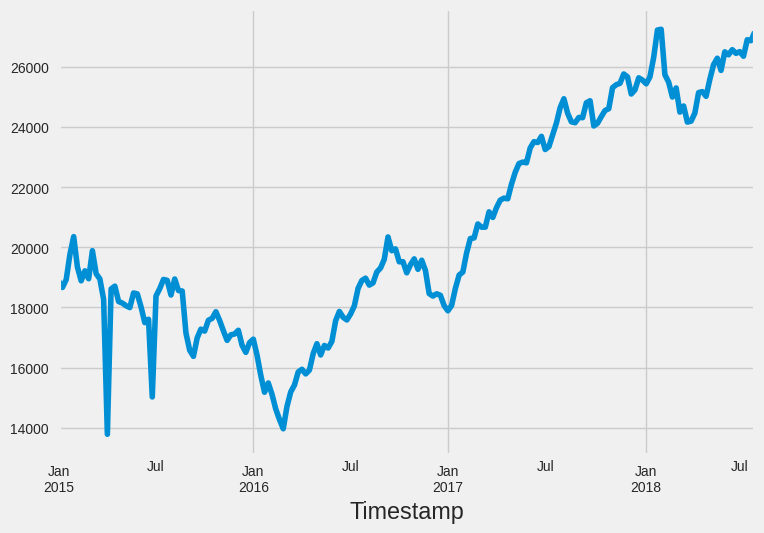

In [92]:
# visual training data
df_train['Close Price'].plot()
plt.show()

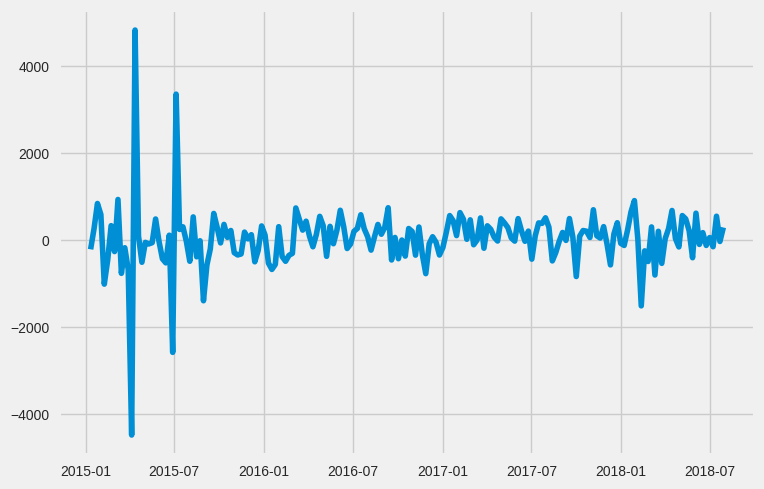

In [93]:
plt.plot(df_train['Close Price'].diff())

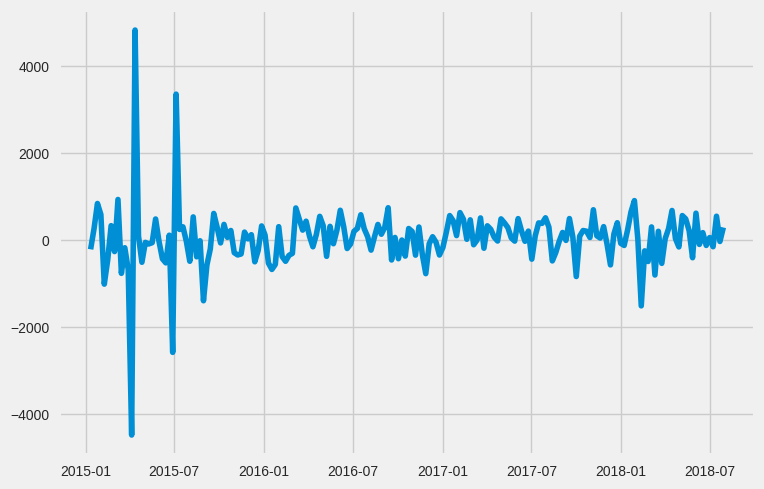

In [94]:
plt.plot(df_train['Close Price'].diff())

<function matplotlib.pyplot.show(close=None, block=None)>

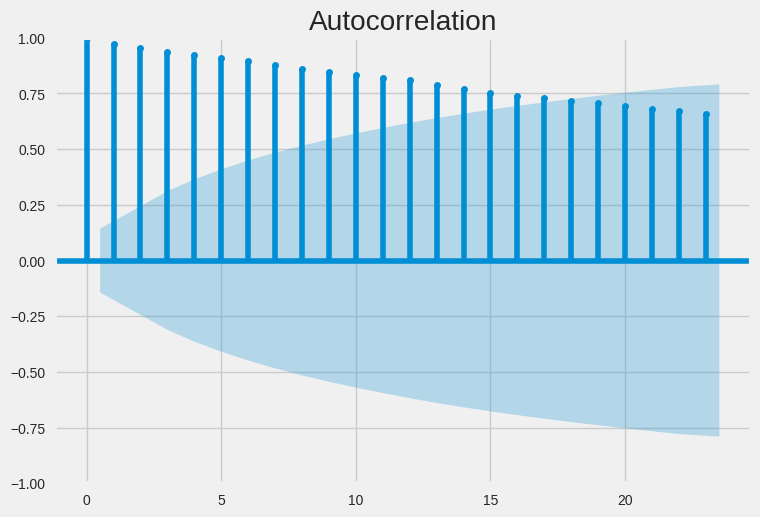

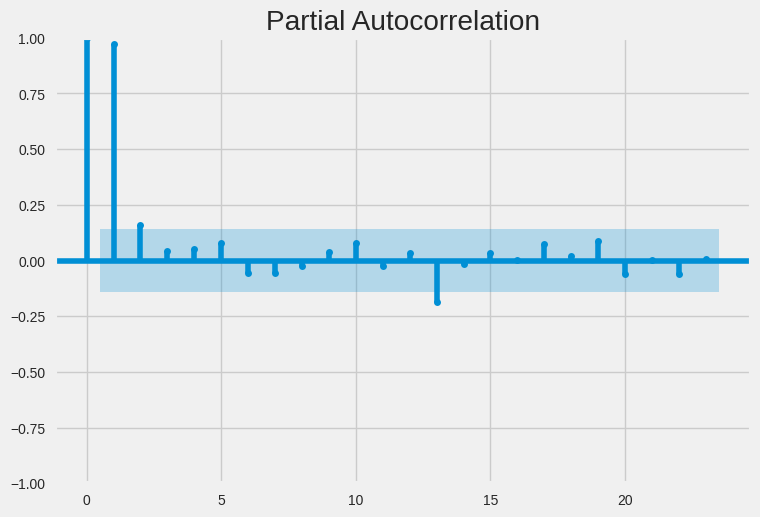

In [95]:
plot_acf(df_train['Close Price'])
plot_pacf(df_train['Close Price'])
plt.show

In [96]:
url = "https://raw.githubusercontent.com/rahmantaufik27/dataset/main/study/forecasting_stock_price_2.csv"
df = pd.read_csv(url, parse_dates=['Timestamp'], index_col='Timestamp')

# Resample to daily data
df = df.resample('W').mean()  # can also use 'W' for weekly, 'H' for hourly, etc.
df

n = int(len(df) * 0.6)
m = int(len(df) * 0.8)

Close=df['Close Price'].values
df_train, train_close = df.head(n), Close[:n]
df_validation, val_close = df[n:m], Close[n:m]
df_test, test_close = df[:m], Close[m:] 

In [97]:
history=[x for x in train_close]
preds=[]
for i in range(len(test_close)):
    model = ARIMA(history, order=(3, 1, 5))
    model_fit = model.fit()
    output = model_fit.forecast()
    pred = output[0]
    preds.append(pred)
    history.append(test_close[i])

In [98]:
# evaluate forecasts
rmse = math.sqrt(mean_squared_error(test_close, preds))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1179.059


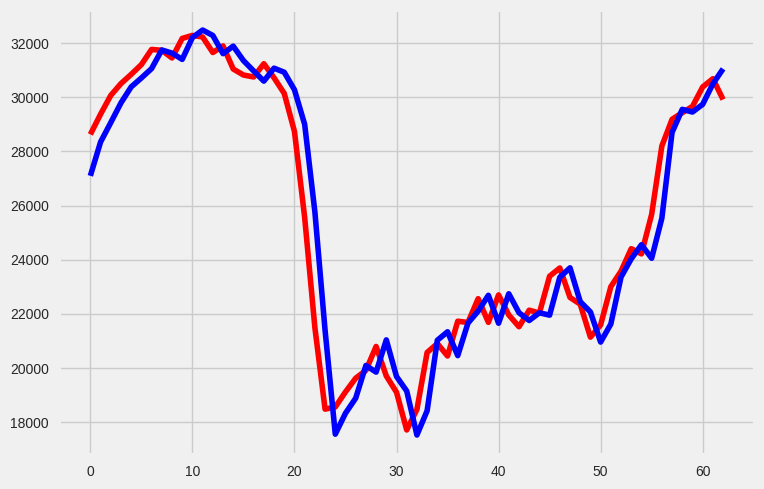

In [99]:
plt.plot(test_close, color='red')
plt.plot(preds, color='blue')